# Is Lottery Fair? 
Lottery is a form of a gambling that involoves the drawing of numbers at random for a prize [wikipedia]. In many countries, even those which do not allow gambling, a weekly lottery is organized by the government. Israel is an example of such country. <br/> 
Since the year 2011, the participants of the Israeli Lottery are required to guess 6 numbers (out of 37) as well as an additional single "Megaball" (out of 7). Chances of winning the first prize are approximately  1:16M, and the first prize usually ranges from 5 to 40 Million Sheqels (today ~1.5-12 Million USD). <br/>
About 10 years ago, a leading news website raised some questions with regards to the lottery due to frequent repetition of the same numbers in a short period of time (see, https://www.ynet.co.il/articles/0,7340,L-3970823,00.html). In this exercise I will explore the results of the Israeli Lottery (published on their official website) and examine whether they align with the theory. <br/>
The short exmination will include 3 tests: <br/>
1. Do drawn numbers distribute equally (i.e., is it better to guess X rather than y) </br>
2. Is there some forme of serial correlation (i.e., if last week x was drawn, does it increase/decrease the chances of x to be drawn this week?)
3. Is there a intra-lottery correlation (i.e., does x tend be drawn with y at the same lottery?) 

We, of course, expect that the answers to be <br/>
1. 'yes'
2. 'no'
3. 'no' 
<br/>


In addition, I will conduct a simulation to examine the chances to get the same result (same 6+1 numbers)  in a sequance of 8 lotteries (has highlighted in the article above). <br/>
Let's see what the data has to say

## The Data
The data consists of all the lottery results from April 2011 until December 1st 2020. <br/>
It should be noted that in earlier lotteries the game was slightly different (changes in the nuber of balss and megaballs) so I will focus only on the ~10yr period after the last change. <br/>
Data can be downloaded here: https://www.pais.co.il/lotto/archive.aspx .

In [40]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline

dirpath="C:/Research/Databases/Lotto"
os.chdir(dirpath)

lotto=pd.read_csv('lotto_eng.csv')
lotto["date"] = pd.to_datetime(lotto["date"], format="%d/%m/%Y")
lotto=lotto[lotto["date"]>'31-03-2011']


## Distribution 

Text(0.5, 1.0, 'Occurances of Numbers (1-37) in the Israeli Lottery 04/2011-12/2020')

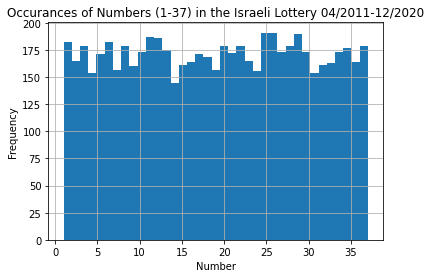

In [41]:
stackedRes=lotto[["ball1","ball2","ball3","ball4","ball5","ball6"]].stack()
Res1=lotto[["ball1","ball2","ball3","ball4","ball5","ball6"]].stack().hist(bins=lotto.ball6.max())
Res1.set_xlabel("Number")
Res1.set_ylabel("Frequency")
Res1.set_title("Occurances of Numbers (1-37) in the Israeli Lottery 04/2011-12/2020")

As can be seen above, the distribution of the drawn numbers is not uniform. That, however, could be expected as the numbers of observations is finite. I will conduct a chi-sqyare test to check whether the observed distribution is statistically different than uniform.

In [42]:
occur=pd.DataFrame(np.arange(lotto.ball6.max())+1)
occur["Occurances"]=0

for i in range(lotto.ball6.max()):
    temp=i+1
    occur["Occurances"].iloc[i]=stackedRes.eq(temp).sum()
    
occur["uniform"]=occur.Occurances.sum()/lotto.ball6.max()

C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [43]:
occur[[0,"Occurances","uniform"]]

,0,Occurances,uniform
0,1,182,171.243243
1,2,165,171.243243
2,3,179,171.243243
3,4,154,171.243243
4,5,171,171.243243
5,6,182,171.243243
6,7,157,171.243243
7,8,179,171.243243
8,9,160,171.243243
9,10,173,171.243243


"manual" calculation of chi2 value

In [44]:
occur["chi2"]=((occur["Occurances"]-occur["uniform"])**2)/occur["uniform"]
occur.chi2.sum()

27.824810606060602

We have 36 (37-1) degrees of freedom here, and the 27.82 calculated value gives us an area of about 83.3. We can see that also by using scipy:

In [45]:
from scipy.stats import chisquare as chi2

In [46]:
chi2(occur["Occurances"], occur["uniform"], axis=0)

Power_divergenceResult(statistic=27.824810606060602, pvalue=0.8333857021318859)

Note that the p-value above suggest a 83.3% fit of the data to a uniform distribution - We **cannot** reject the hypothesis that it is drawned from a uniform distribution (at a resonable level such as 5% or even 10%). <br/>
So far so good. Now the same with the MegaBall

Text(0.5, 1.0, 'Occurances of MegaBall (1-7) in the Israeli Lottery 04/2011-12/2020')

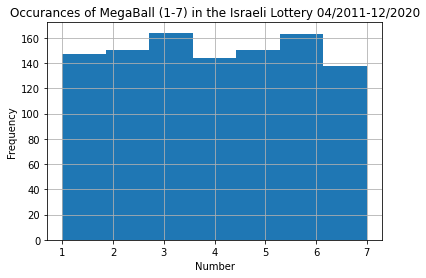

In [47]:
Res1=lotto[["ball_extra"]].stack().hist(bins=lotto.ball_extra.max())
Res1.set_xlabel("Number")
Res1.set_ylabel("Frequency")
Res1.set_title("Occurances of MegaBall (1-7) in the Israeli Lottery 04/2011-12/2020")

In [48]:
occur=pd.DataFrame(np.arange(lotto.ball_extra.max())+1)
occur["Occurances"]=0

for i in range(lotto.ball_extra.max()):
    temp=i+1
    occur["Occurances"].iloc[i]=stackedRes.eq(temp).sum()
    
occur["uniform"]=occur.Occurances.sum()/lotto.ball_extra.max()

C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [49]:
chi2(occur["Occurances"], occur["uniform"], axis=0)

Power_divergenceResult(statistic=4.8235294117647065, pvalue=0.5666380449691941)

In [50]:
occur

,0,Occurances,uniform
0,1,182,170.0
1,2,165,170.0
2,3,179,170.0
3,4,154,170.0
4,5,171,170.0
5,6,182,170.0
6,7,157,170.0


Also in the megaball results we cannot reject the H0 uniform distribution hypothesis.  

## Serial Correlation

To examine serial correlation I chose to manipulate the data so that I will have 37 variables, each corresponds with the occurance of a certain number (1 = drawn /0 = not). Each row represents a lottery (observation). <br/>

In [57]:
b1 = pd.get_dummies(lotto.ball1, prefix='b')
b2 = pd.get_dummies(lotto.ball2, prefix='b')
b3 = pd.get_dummies(lotto.ball3, prefix='b')
b4 = pd.get_dummies(lotto.ball4, prefix='b')
b5 = pd.get_dummies(lotto.ball5, prefix='b')
b6 = pd.get_dummies(lotto.ball6, prefix='b')
be = pd.get_dummies(lotto.ball_extra, prefix='ex')

b=b1.add(b2, fill_value=0).add(b3, fill_value=0).add(b4, fill_value=0).add(b5, fill_value=0).add(b6, fill_value=0).add(be, fill_value=0).sort_index(axis=1)

del b1, b2, b3, b4, b5, b6, be

b.head()

,b_1,b_10,b_11,b_12,b_13,b_14,b_15,b_16,b_17,b_18,...,b_7,b_8,b_9,ex_1,ex_2,ex_3,ex_4,ex_5,ex_6,ex_7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Now, for each variable (each column) we want to check whether it has auto correlation - if its past occurance is meaningful somehow today (increases or decreaces the chances of the number to be redrawn). <br/>
In order to more easily answer this question I am going to look onl for the lowest p-value of the F statistic when regressing each variable on its last 4 lagged values: <br/>
Bi(t)=a0+a1*Bi(t-1)+a2*Bi(t-2)+a3*Bi(t-3)+a4*Bi(t-4)+err <br/>
where Bi represents a ball number i (i=1,2,3,...,37, ex1,ex2,...ex7).
If we will find a high statistical explanatory power we will dive deeper. It should be noted that it would have make sense to use Logit here.

,0,number
19,0.006414,b_27


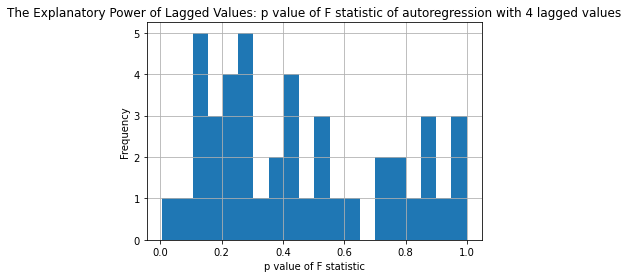

In [74]:
import statsmodels.api as sm

p_list=[]
ball="NoBall"

for i in b.columns:
    temp=b[i].to_frame(name='y')
    temp['const']=1
    temp['x1']=b[i].shift(-1)
    temp['x2']=b[i].shift(-2)
    temp['x3']=b[i].shift(-3)
    temp['x4']=b[i].shift(-4)
    temp=temp.dropna(axis=0)
    x=temp[['const','x1','x2','x3','x4']]
    y=temp["y"]
    model = sm.OLS(endog=y, exog=x, missing='drop', hasconst=1)
    results = model.fit()
    p_list.append(results.f_pvalue)

Fpvals=pd.DataFrame(p_list)
Fpvals["number"]=b.columns
Res=Fpvals[0].hist(bins=20)
Res.set_xlabel("p value of F statistic")
Res.set_ylabel("Frequency")
Res.set_title("The Explanatory Power of Lagged Values: p value of F statistic of autoregression with 4 lagged values")
Fpvals[Fpvals[0]<0.05]

As can be seen above, in 1 case we can not reject the F test at the 5% level.This case is the number 27. 
The means that knowing that that 27 was drawn before may tell us someting about the chances 27 will be drawn in the next lottery. Or, in other words, there is an explanatory power of the past results on the current result for 27.  <br/>
Let's take a closer look at the results of the estimation of Ball27 dummy variable:

In [78]:
i='b_27'
temp=b[i].to_frame(name='y')
temp['const']=1
temp['x1']=b[i].shift(-1)
temp['x2']=b[i].shift(-2)
temp['x3']=b[i].shift(-3)
temp['x4']=b[i].shift(-4)
temp=temp.dropna(axis=0)
x=temp[['const','x1','x2','x3','x4']]
y=temp["y"]
model = sm.OLS(endog=y, exog=x, missing='drop', hasconst=1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.595
Date:                Sun, 27 Dec 2020   Prob (F-statistic):            0.00641
Time:                        14:37:04   Log-Likelihood:                -441.53
No. Observations:                1052   AIC:                             893.1
Df Residuals:                    1047   BIC:                             917.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1734      0.015     11.252      0.0

So regressing B27(t) [y] on B27(t-1),B27(t-2),B27(t-3) and B27(t-4) [x1,x2,x3, and x4, respectively] reveals an interesting finding, as discussed earlier. Nevertheless, the R2 is quite low (1.4%). <br/>
We expect the constant of this estimation to be at the magnitude of 6/37=0.162 (the porbability of a numner to be drawn) and it is within the CI of the coefficient. Results further suggest that if 27 is drawn in a specific lottery, it is about 50% less likely to be drawn at the next one and ~50% more likely to be drawn in the lottery after the next. 
Exciting news! next time you get a lottery ticket look for the 27. Before we rush for conclusions, lets check the robustness of this result by changing the estimators a bit. Note that x3 and x4 are not statistically significat, yet x4 is "econimically meaningfull". That means that taking it out of the estimated model may have an effect on the results (if there id correlation between the right-hand-side variables). 

In [79]:
x=temp[['const','x1','x2']]
model = sm.OLS(endog=y, exog=x, missing='drop', hasconst=1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.236
Date:                Sun, 27 Dec 2020   Prob (F-statistic):            0.00203
Time:                        14:54:43   Log-Likelihood:                -442.49
No. Observations:                1052   AIC:                             891.0
Df Residuals:                    1049   BIC:                             905.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.014     12.258      0.0

That seems to be robust. We will go back to this point taking a simulation approach with randomly generated numbers. <br/>
For now we can say that there are **some evidance** of serial correlation in our data for at least one Ball number.
</br>
</br>

It should further be noted that an explantory power of *any* number or set of numbers should not exist (theoretically) - not just autocorrelation (where past 27s tells us something about current 27) but also with any other number (for example, past 26 tells us something about 27 or past combination of 12 and 15 tells us something about 27). We just chose autocorrelation as a representative of this examination. Since we find something that deviates from theory - there is a room to expand this examination by looking at correlation between all numbers and their lagged occurances. <br/>

To tacle this, below I check the correlation between all numbers and all numbers lagged values. 


In [90]:
b_withlaggedV=b[:]
for i in b.columns:
    b_withlaggedV['L1'+i]=b[i].shift(-1)
    b_withlaggedV['L2'+i]=b[i].shift(-2)
b_withlaggedV.corr()    

C:\Users\rgolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rgolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,b_1,b_10,b_11,b_12,b_13,b_14,b_15,b_16,b_17,b_18,...,L1ex_3,L2ex_3,L1ex_4,L2ex_4,L1ex_5,L2ex_5,L1ex_6,L2ex_6,L1ex_7,L2ex_7
b_1,1.000000,-0.046176,-0.014641,-0.013538,-0.028058,-0.036356,0.001757,-0.057216,-0.037241,-0.069254,...,-0.042476,-0.001014,0.015772,0.037529,-0.027849,-0.013661,0.040818,-0.028784,-0.013442,0.045920
b_10,-0.046176,1.000000,0.002444,0.003549,-0.066536,0.001823,-0.024029,-0.034384,-0.013989,0.002187,...,0.023169,-0.005343,0.032711,-0.034573,0.010283,-0.033876,0.001920,0.037162,-0.057924,0.033025
b_11,-0.014641,0.002444,1.000000,-0.051689,0.033427,-0.062541,-0.031126,-0.089323,-0.042297,-0.013039,...,-0.012993,-0.006315,-0.011020,0.032190,-0.011284,-0.004357,0.028212,-0.040659,-0.003391,-0.003562
b_12,-0.013538,0.003549,-0.051689,1.000000,-0.025565,-0.040013,-0.009391,-0.019810,-0.075034,0.008360,...,-0.039485,-0.045595,0.033417,-0.016522,0.018194,0.033350,-0.005075,-0.018004,-0.002433,-0.023822
b_13,-0.028058,-0.066536,0.033427,-0.025565,1.000000,-0.059415,0.002261,-0.022347,0.032229,-0.048670,...,0.027934,-0.014552,-0.021423,0.060066,-0.021025,0.015288,-0.007318,-0.035707,-0.006734,0.008218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L2ex_5,-0.013661,-0.033876,-0.004357,0.033350,0.015288,-0.059250,-0.074828,0.036071,-0.039304,0.021824,...,-0.001482,-0.174227,0.035634,-0.162040,-0.041563,1.000000,0.028560,-0.174227,-0.029300,-0.158108
L1ex_6,0.040818,0.001920,0.028212,-0.005075,-0.007318,0.021020,-0.020966,-0.001334,0.004128,-0.022243,...,-0.182735,-0.008765,-0.169955,0.013222,-0.174033,0.028560,1.000000,0.005749,-0.165831,0.012901
L2ex_6,-0.028784,0.037162,-0.040659,-0.018004,-0.035707,0.051423,0.059093,-0.030537,-0.031637,0.049090,...,0.020264,-0.182941,-0.063180,-0.170144,0.021050,-0.174227,0.005749,1.000000,0.059575,-0.166015
L1ex_7,-0.013442,-0.057924,-0.003391,-0.002433,-0.006734,0.001343,0.022985,0.028612,0.035334,0.029843,...,-0.165831,-0.002657,-0.154233,0.009386,-0.157934,-0.029300,-0.165831,0.059575,1.000000,-0.033922


count    3.872000e+03
mean    -2.710765e-07
std      3.102330e-02
min     -9.599547e-02
25%     -2.115624e-02
50%     -1.625317e-04
75%      2.085503e-02
max      1.279657e-01
Name: correlation, dtype: float64

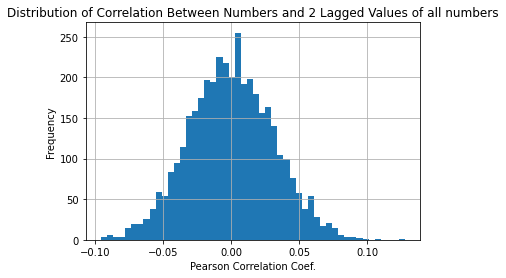

In [127]:
correl=b_withlaggedV.corr().stack(0).reset_index()
correl["correlation"]=correl[0][correl[0]<1]
#correl["Lagged"]=lambda x:str(x)[0] correl["level_1"]
correl.loc[:,'Lagged0'] = correl.level_0.apply(lambda x: x[0])
correl.loc[:,'Lagged1'] = correl.level_1.apply(lambda x: x[0])
correl=correl[(correl['Lagged0']!="L") & (correl['Lagged1']=="L")]
correl
CorrRes=correl["correlation"].hist(bins=50)
CorrRes.set_xlabel("Pearson Correlation Coef.")
CorrRes.set_ylabel("Frequency")
CorrRes.set_title("Distribution of Correlation Between Numbers and 2 Lagged Values of all numbers")
correl["correlation"].describe().T

Overall, the results here make sense. Mean value of about zero. Symeteic distribution... The correlactions are quite low (absolute value lower than 0.1), std of 0.03.. can't get much lower than that. Still, these low correlations of 0.07-0.08 (see below) where enough to provide some statistically and economically significant insight. We will further examine this in the simulation.  


In [133]:
correl[(correl['level_0']=='b_27') & ( (correl['level_1']=='L1b_27') | (correl['level_1']=='L2b_27') ) ]

,level_0,level_1,0,correlation,Lagged0,Lagged1
2590,b_27,L1b_27,-0.085519,-0.085519,b,L
2591,b_27,L2b_27,0.073334,0.073334,b,L


## Frequent couplets 

Now we turn to examine the intra-lottery results correlation: do 5 and 19 tend to be drawnd together? If the first ball is 7, does it increase the odds for 26 to be drawn? I will take a similar approach to the autocorrelation that was explored above - regressing all numbers on all other numbers using the manipulated dataframe where each column is a single number and a value of 1 suggests that this number was drawn in the lottery represented in that specific row.


Text(0.5, 1.0, 'The Explanatory Power of Other Values: p value of F statistic of each number over all the oter numbers')

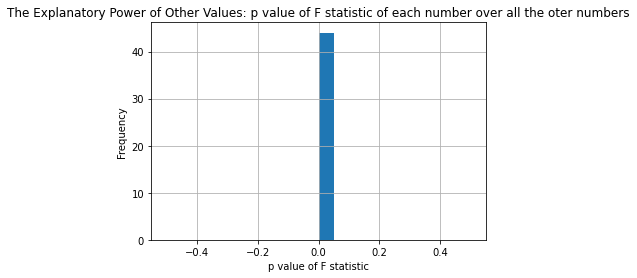

In [134]:
p_list=[]

for i in b.columns:
    y=b[i]
    x=b.drop(i,axis=1)
    model = sm.OLS(endog=y, exog=x, missing='drop', hasconst=1)
    results = model.fit()
    p_list.append(results.f_pvalue)

Fpvals2=pd.DataFrame(p_list)
Fpvals2["number"]=b.columns
Res2=Fpvals2[0].hist(bins=20)
Res2.set_xlabel("p value of F statistic")
Res2.set_ylabel("Frequency")
Res2.set_title("The Explanatory Power of Other Values: p value of F statistic of each number over all the oter numbers")
#Fpvals2[Fpvals2[0]<0.05]

Well... oops... that actually was expected... :) Within each lottery, each number is a linear combination of all the rest. If we see only five 1s it means that the number at hand is the sixth, and if we see six 1s - obviousley that the number at hand was not drawn.... Need to think on a deffiernt approach... 

We can, for example, randomly select N (explanatory) numbers each time and check whether they has an explanatory power for number i to be drawn. N should be low enough to minimze the effect we just saw above in which it provides so much information that the results are redundant. Perhaps try N=5 with 100 different combinations each time for each (left-hand-side) number and report the min p value of the F statistic. <br/>
We can also look again at the intra-lottery correlations of drawn numbers.   

count    1591.000000
mean       -0.023238
std         0.030277
min        -0.096159
25%        -0.043426
50%        -0.025040
75%        -0.002363
max         0.076447
Name: correlation, dtype: float64

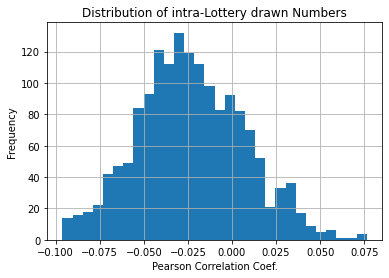

In [157]:
correl=b_withlaggedV.corr().stack(0).reset_index()
correl["correlation"]=correl[0][correl[0]<1]
correl.loc[:,'Lagged0'] = correl.level_0.apply(lambda x: x[0])
correl.loc[:,'Lagged1'] = correl.level_1.apply(lambda x: x[0])
correl=correl[(correl['Lagged0']!="L") & (correl['Lagged1']!="L")]
correl=correl[(correl['Lagged0']!="e")]
CorrRes=correl["correlation"].hist(bins=30)
CorrRes.set_xlabel("Pearson Correlation Coef.")
CorrRes.set_ylabel("Frequency")
CorrRes.set_title("Distribution of intra-Lottery drawn Numbers")
correl["correlation"].describe().T

The intra-lottery correlations, as we see here, are quite low. again mean value of 0; std is about 0.03.  

# Simulation Approach

## Lottery function 
We first create our very own lottery results; same size as the actual results we have (~1,050 lotteries) 

In [156]:
import random
def lottery():
    balls = random.sample(range(1,38,1), 6)
    extra_ball = random.sample(range(1,8,1), 1)
    balls.append(extra_ball[0])
    return pd.DataFrame([balls], columns =['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6', 'extra_ball'])

for i in range(1050):
    if i==0:
        LotSim=lottery()
    else:
        LotSim=pd.concat([LotSim,lottery()], ignore_index=True)

LotSim.head()       

,Ball1,Ball2,Ball3,Ball4,Ball5,Ball6,extra_ball
0,2,20,17,21,5,1,1
1,22,18,11,37,33,34,2
2,37,15,21,13,30,31,5
3,22,24,7,31,37,15,5
4,31,28,24,9,1,4,4


## Correlations in Simulated Data

Now, I want to check the correlations between Ball numbers and between them and their Lagged values - as we did before. 
I will do that 1,000 times and find the distribution of standard deviation of the correlations and use it to check the probability to get the values w found above (recall that std of correations were about 0.03) 

In [165]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

#code starts here
for k in range(1000):
    for j in range(1050):
        if j==0:
            LotSim=lottery()
        else:
            LotSim=pd.concat([LotSim,lottery()], ignore_index=True)

    b1 = pd.get_dummies(LotSim.Ball1, prefix='b')
    b2 = pd.get_dummies(LotSim.Ball2, prefix='b')
    b3 = pd.get_dummies(LotSim.Ball3, prefix='b')
    b4 = pd.get_dummies(LotSim.Ball4, prefix='b')
    b5 = pd.get_dummies(LotSim.Ball5, prefix='b')
    b6 = pd.get_dummies(LotSim.Ball6, prefix='b')
    be = pd.get_dummies(LotSim.extra_ball, prefix='ex')

    b=b1.add(b2, fill_value=0).add(b3, fill_value=0).add(b4, fill_value=0).add(b5, fill_value=0).add(b6, fill_value=0).add(be, fill_value=0).sort_index(axis=1)

    del b1, b2, b3, b4, b5, b6, be    

    b_withlaggedV=b[:]

    for i in b.columns:
        b_withlaggedV['L1'+i]=b[i].shift(-1)
        b_withlaggedV['L2'+i]=b[i].shift(-2)

    correl=b_withlaggedV.corr().stack(0).reset_index()
    correl["correlation"]=correl[0][correl[0]<1]
    correl.loc[:,'Lagged0'] = correl.level_0.apply(lambda x: x[0])
    correl.loc[:,'Lagged1'] = correl.level_1.apply(lambda x: x[0])
    #Lagged Vs current
    correl1=correl[(correl['Lagged0']!="L") & (correl['Lagged1']=="L")]
    lagged_std=correl1["correlation"].std()
    #intra-Lottery
    correl2=correl[(correl['Lagged0']!="L") & (correl['Lagged1']!="L") & (correl['Lagged0']!="e")]
    intra_std=correl2["correlation"].std()
    
    temp=pd.DataFrame([[lagged_std, intra_std]], columns =['LaggedSTD', 'IntraSTD'])
    if k==0:
        STDs=temp
    else:
        STDs=pd.concat([STDs, temp], ignore_index=True)
STDs        
        

,LaggedSTD,IntraSTD
0,0.031080,0.032707
1,0.031308,0.031552
2,0.030751,0.030673
3,0.030307,0.032513
4,0.031307,0.032872
...,...,...
995,0.030594,0.030734
996,0.030910,0.030618
997,0.030829,0.031459
998,0.030849,0.031186


In [187]:
#rank 
STDs2=STDs[:]
STDs2["Sim"]=1
temp=pd.DataFrame([[0.0310233, 0.030277,0]], columns=['LaggedSTD','IntraSTD','Sim'])
STDs2=pd.concat([STDs2, temp], ignore_index=True)
STDs2['Lagged_Rank'] = STDs2['LaggedSTD'].rank(ascending=True)
STDs2['Intra_Rank'] = STDs2['IntraSTD'].rank(ascending=True)
STDs2[STDs2['Sim']==0]

,LaggedSTD,IntraSTD,Sim,Lagged_Rank,Intra_Rank
1000,0.031023,0.030277,0,617.0,77.0


The simulation gives us prespective on how high/low are the correlations we find in the observed data. <br/>
Since we ran the simulation 1,000 times - each rank can be seen as 0.1% probabiliy. 
The 0.031023 and the 0.030277 standard deviations for the autocorrelation and intra-lottery coefficients are similar to the values that are ranked 617 and 77 - that can therefore be translated into the following: <br/>
*Auto-Correlation and correlation with lagged values of other numbers:* 383/1000 times we find in simulated data with higher standard deviation of correlation coeficients than we found in the observed data - that means that the data behaves much like the simulated data in this sence. <br/>
*intra lottery correlations:* 923/1000 times we find in simulated data with higher standard deviation of correlation coeficients than we found in the observed data - that means that the data is within the range and behaves "better" than most simulated data. <br/>

The conclusion is that I did not find evidance that suggest that Lottery is not fair.

## Same number 6 times in 8 lotteries 

The 2010 article pointed out that the same number (14) repeated 6 times along a sequence of 8 lotteries. What are the chances for that? <br/>
If we draw 6 balls out of 37 chances for a specific ball to be drawn once is 6/37. Chances that a 6/37 probability to accure 6 (or more) out of 8 times is in the scale of ~ (8!/(6!2!))(6/37)^6 = 0.00051 or about once in 2,000 cases. Very rare but not completely unlikely. Since we do not care about which number would it be (14 , 19 or 25) chances are 37 times larger - which brings us to about 1.8% Lets see what we find in a simulation. <br/>
I will simulate 8 lotteries a 1,000 times and count the cases in which same ball was drawn at least 6 times. 

In [201]:
count=0
for k in range(1000):
    for j in range(8):
        temp=pd.DataFrame([random.sample(range(1,38,1), 6)], columns =['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6'])
        if j==0:
            LotSim=temp
        else:
            LotSim=pd.concat([LotSim,temp], ignore_index=True)
    MaxRep=LotSim.stack(0).reset_index().groupby(0).count().max()[0]
    if MaxRep>=6:
        count+=1
print(str(count) + " / 1000 times we find the same number 6 times in a sequence of 8 lotteries")        

15 / 1000 times we find the same number 6 times in a sequence of 8 lotteries


Simulation confirms that this kind of sequence is not so rare.. 

## Same exact set of 6 numbers twice in 8 lotteries 

Here I admit that chances seem very very low.... they are in the scale of the probability of winning the first prize after 7 trials. I will run a simulation to make sure my intuition here is correct: That will include simulating 100k lotteries and count the time differnce between repeating occurances. 

In [253]:
for k in range(100000):
    temp=pd.DataFrame([sorted(random.sample(range(1,38,1), 6))], columns =['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6'])
    if k==0:
        df=temp
    else:
        df=pd.concat([df, temp], ignore_index=True)
       

In [254]:
df['Dup'] = np.where(df.duplicated(), 1, 0)
df['seq']=df.index
#rep=df[df['Dup']==1]
rep=df[['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6']][df['Dup']==1]
rep=rep.drop_duplicates(keep='first')
rep=rep.reset_index()

df=pd.merge(df,rep, how='right', on=['Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5', 'Ball6'])
df=df[['seq','index']]
df['deltaIndex']=df['index']-df['index'].shift(1)
df['delta']=df['seq']-df['seq'].shift(1)
df=df[(df['deltaIndex']!=0) & (abs(df['delta'])<=8)]
count=len(df)
print(str(count) + " / 100k times we find the exact same set of 6 numbers in a sequence of 8 lotteries") 

0 / 100k times we find the exact same set of 6 numbers in a sequence of 8 lotteries


The results above confim the intuition (and theory...) - chances for redrawing the same set of numbers within 8 lotteries are extremely low. not even once in simulated 100k lotteries (~1,000 years of bi-weekly lotteries). Obviously, the fact that it is rare does not mean that it is impossible...   

# Summary and Conclusions

In this Exercise we used different approaches to exmine whether lottery results are fair or not.
We looked for a correlation between current drawn numbers and histrorical drawn numbers as well as correlation among drawn numbers in each lottery and (not surprisingly) **find low levels of correlations**. We further show that those low levels are **within the range** that could be expected in randomly drawn numbers using a simulation. Finally, we went back to the article that motivated this exercise and used a simulation to exmine the likelihood of such repeated occurances of drawn numbers in the lottery. Finding suggest that while finding the same number 6 times in 8 lotteries is quite likely, having the same exact set of numbers twice in 8 lotteries is in did a very rare event...  <br/>
See you next time. In sum, we did not find any *systematic* problem with the lottery. 